In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Question 1. Plot a graph showing Goals per competition

In [2]:
df=pd.read_csv('ronaldodata.csv')
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN


In [3]:
df.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     57
Minute                0
At_score              0
Type                 15
Goal_assist         240
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            698 non-null    object
 1   Competition       698 non-null    object
 2   Matchday          698 non-null    object
 3   Date              698 non-null    object
 4   Venue             698 non-null    object
 5   Club              698 non-null    object
 6   Opponent          698 non-null    object
 7   Result            698 non-null    object
 8   Playing_Position  641 non-null    object
 9   Minute            698 non-null    object
 10  At_score          698 non-null    object
 11  Type              683 non-null    object
 12  Goal_assist       458 non-null    object
dtypes: object(13)
memory usage: 71.0+ KB


In [5]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [6]:
df['Playing_Position'].fillna(df['Playing_Position'].mode().values[0],inplace =True)
df['Type'].fillna(df['Type'].mode().values[0],inplace =True)

In [7]:
df['Goal_assist'].fillna('Nill',inplace=True)
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3:0,Right-footed shot,Nill
5,03/04,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:0,RW,80,2:0,Direct free kick,Nill
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:2,RW,74,3:0,Right-footed shot,Nill
7,03/04,Premier League,29,3/20/04,H,Manchester United,Tottenham Hotspur,3:0,LW,89,2:0,Right-footed shot,Nill
8,03/04,Premier League,32,4/10/04,A,Manchester United,Birmingham City,1:2,LW,60,1:1,Header,Ryan Giggs
9,03/04,Premier League,38,5/15/04,A,Manchester United,Aston Villa,0:2,LW,4,0:1,Right-footed shot,Nill


In [8]:
df.rename({'At_score':'Goals_scored'},axis=1,inplace=True)
df['Goals_scored'] = df['Goals_scored'].str.replace(":0","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":1","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":2","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":3","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":4","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":5","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":6","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":7","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":8","")
df['Goals_scored'] = df['Goals_scored'].str.replace(":9","")

df['Goals_scored'] = pd.to_numeric(df['Goals_scored'] )
df['Playing_Position'] = df['Playing_Position'].str.replace("LW ","LW")
df['Playing_Position'] = df['Playing_Position'].str.replace("CF ","CF")
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill
5,03/04,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:0,RW,80,2,Direct free kick,Nill
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:2,RW,74,3,Right-footed shot,Nill
7,03/04,Premier League,29,3/20/04,H,Manchester United,Tottenham Hotspur,3:0,LW,89,2,Right-footed shot,Nill
8,03/04,Premier League,32,4/10/04,A,Manchester United,Birmingham City,1:2,LW,60,1,Header,Ryan Giggs
9,03/04,Premier League,38,5/15/04,A,Manchester United,Aston Villa,0:2,LW,4,0,Right-footed shot,Nill


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            698 non-null    object
 1   Competition       698 non-null    object
 2   Matchday          698 non-null    object
 3   Date              698 non-null    object
 4   Venue             698 non-null    object
 5   Club              698 non-null    object
 6   Opponent          698 non-null    object
 7   Result            698 non-null    object
 8   Playing_Position  698 non-null    object
 9   Minute            698 non-null    object
 10  Goals_scored      698 non-null    int64 
 11  Type              698 non-null    object
 12  Goal_assist       698 non-null    object
dtypes: int64(1), object(12)
memory usage: 71.0+ KB


In [10]:
df2=df.copy()
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [11]:
df3=pd.crosstab(df2['Competition'],df2['Club'])
df3.reset_index(inplace=True)
df3

Club,Competition,Juventus FC,Manchester United,Real Madrid,Sporting CP
0,Copa del Rey,0,0,22,0
1,EFL Cup,0,4,0,0
2,FA Cup,0,13,0,0
3,FIFA Club World Cup,0,1,6,0
4,Italy Cup,4,0,0,0
5,LaLiga,0,0,311,0
6,Liga Portugal,0,0,0,3
7,Premier League,0,102,0,0
8,Serie A,81,0,0,0
9,Supercopa,0,0,4,0


In [12]:
df3.rename({'Club':'Index'},axis=1,inplace=True)
df3

Club,Competition,Juventus FC,Manchester United,Real Madrid,Sporting CP
0,Copa del Rey,0,0,22,0
1,EFL Cup,0,4,0,0
2,FA Cup,0,13,0,0
3,FIFA Club World Cup,0,1,6,0
4,Italy Cup,4,0,0,0
5,LaLiga,0,0,311,0
6,Liga Portugal,0,0,0,3
7,Premier League,0,102,0,0
8,Serie A,81,0,0,0
9,Supercopa,0,0,4,0


In [13]:
df3['TGSPC']=df3['Juventus FC']+df3['Manchester United']+df3['Real Madrid']+df3['Sporting CP']


df3


Club,Competition,Juventus FC,Manchester United,Real Madrid,Sporting CP,TGSPC
0,Copa del Rey,0,0,22,0,22
1,EFL Cup,0,4,0,0,4
2,FA Cup,0,13,0,0,13
3,FIFA Club World Cup,0,1,6,0,7
4,Italy Cup,4,0,0,0,4
5,LaLiga,0,0,311,0,311
6,Liga Portugal,0,0,0,3,3
7,Premier League,0,102,0,0,102
8,Serie A,81,0,0,0,81
9,Supercopa,0,0,4,0,4


In [14]:
df3['Competition']

0                         Copa del Rey
1                              EFL Cup
2                               FA Cup
3                  FIFA Club World Cup
4                            Italy Cup
5                               LaLiga
6                        Liga Portugal
7                       Premier League
8                              Serie A
9                            Supercopa
10                 Supercoppa Italiana
11            Taca de Portugal Placard
12               UEFA Champions League
13    UEFA Champions League Qualifying
14                      UEFA Super Cup
Name: Competition, dtype: object

In [15]:
# create color dictionary

#color_dict = {'UEFA Champions League Qualifying':'green', 'UEFA Super Cup':'red','UEFA Champions League':'blue', 'Taca de Portugal Placard':'orange',
#             'Supercoppa Italiana':'purple', 'Supercopa':'yellow','Serie A':'violet', 'Premier League':'pink','Liga Portugal':'cyan',
#             'LaLiga':'margenta', 'Italy Cup':'violet', 'FIFA Club World Cup':'brown','FA Cup':'gray', 'EFL Cup':'gold', 'Copa del Rey':'black'}


#plt.figure(figsize = (20, 10))
#plt.barh(df3['Competition'],df3['TGSPC'],color='rgb')
#plt.ylabel('Total Goal Per competition',color='green')
#plt.xlabel('Name of Competition',color='green')
#plt.title('RONALDO\'S GOALS SCORED PER COMPETITION',color='red')
#plt.legend()
#plt.show()


# build the colors from the color dictionary
#ax = plt.barh(range(len(df3['Competition']), df3['TGSPC'], 0.6, tick_label = df3['Competition'], color=[color_dict[r] for r in df3['Competition']]))

In [16]:
#fig=px.pie(df3,values='TGSPC',names='Competition',title='RONALDO\'S GOALS SCORED PER COMPETITION')
#fig.update_layout(height=800,width=800)
#fig.show()

In [17]:
#fig=px.bar(x=df3['TGSPC'],y=df3['Competition'],title='RONALDO\'S GOALS PER COMPETITION',color=df3['TGSPC'],text=df3['Competition'],labels={'x':'TGSPC','y':'Competition'},color_continuous_scale='amp')
#fig.show()

No handles with labels found to put in legend.


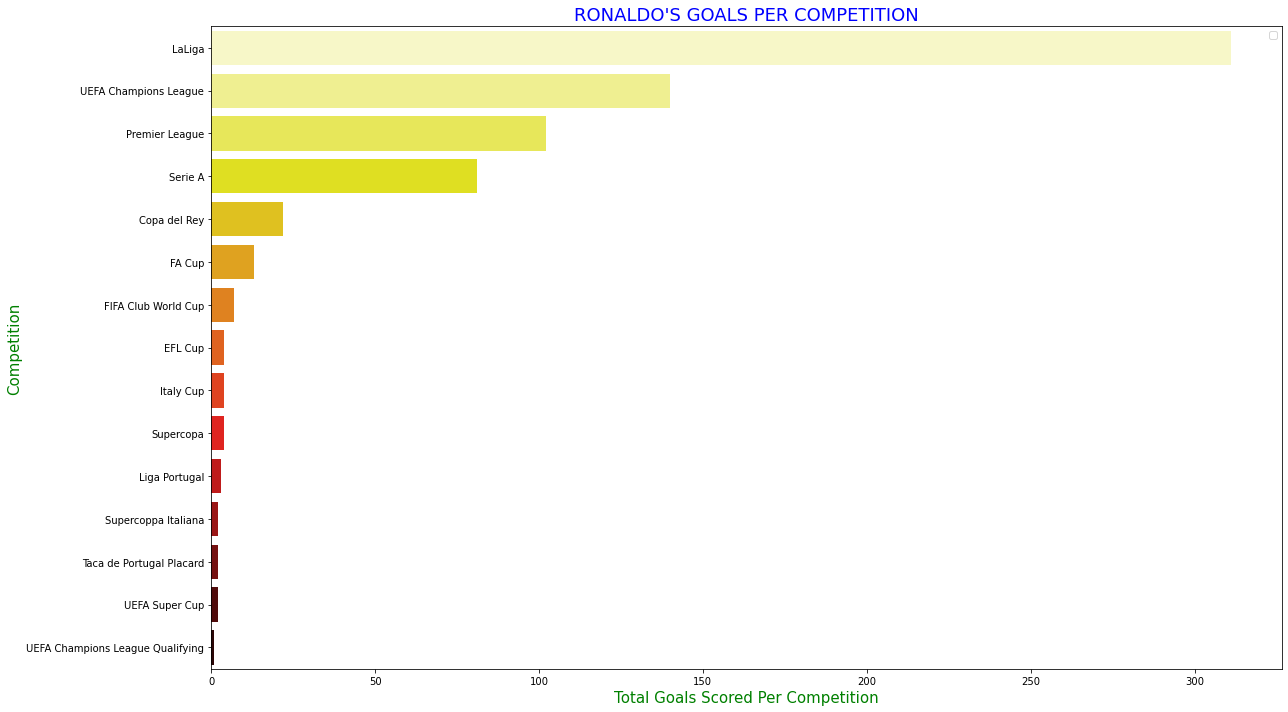

In [18]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='TGSPC', y="Competition",
            data=df3,
            palette='hot_r',
            order=df3.sort_values('TGSPC',ascending=False).Competition)#in descending order
#           order=df3.sort_values('TGSPC').Competition)#in ascending order
# set labels
plt.ylabel("Competition",color='g',size=15)
plt.xlabel("Total Goals Scored Per Competition",color='g',size=15)
plt.title("RONALDO\'S GOALS PER COMPETITION",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoGPC_barplot_Seaborn_Python.png", dpi=100)


# Question 2: Plot a graph showing Goals per season

In [19]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [20]:
df4=pd.crosstab(df2['Season'],df2['Club'])
df4.reset_index(inplace=True)
df4.head(10)

Club,Season,Juventus FC,Manchester United,Real Madrid,Sporting CP
0,02/03,0,0,0,5
1,03/04,0,6,0,0
2,04/05,0,9,0,0
3,05/06,0,12,0,0
4,06/07,0,23,0,0
5,07/08,0,42,0,0
6,08/09,0,26,0,0
7,09/10,0,0,33,0
8,10/11,0,0,53,0
9,11/12,0,0,60,0


In [21]:
df4['TGSPS']=df4['Juventus FC']+df4['Manchester United']+df4['Real Madrid']+df4['Sporting CP']
df4

Club,Season,Juventus FC,Manchester United,Real Madrid,Sporting CP,TGSPS
0,02/03,0,0,0,5,5
1,03/04,0,6,0,0,6
2,04/05,0,9,0,0,9
3,05/06,0,12,0,0,12
4,06/07,0,23,0,0,23
5,07/08,0,42,0,0,42
6,08/09,0,26,0,0,26
7,09/10,0,0,33,0,33
8,10/11,0,0,53,0,53
9,11/12,0,0,60,0,60


No handles with labels found to put in legend.


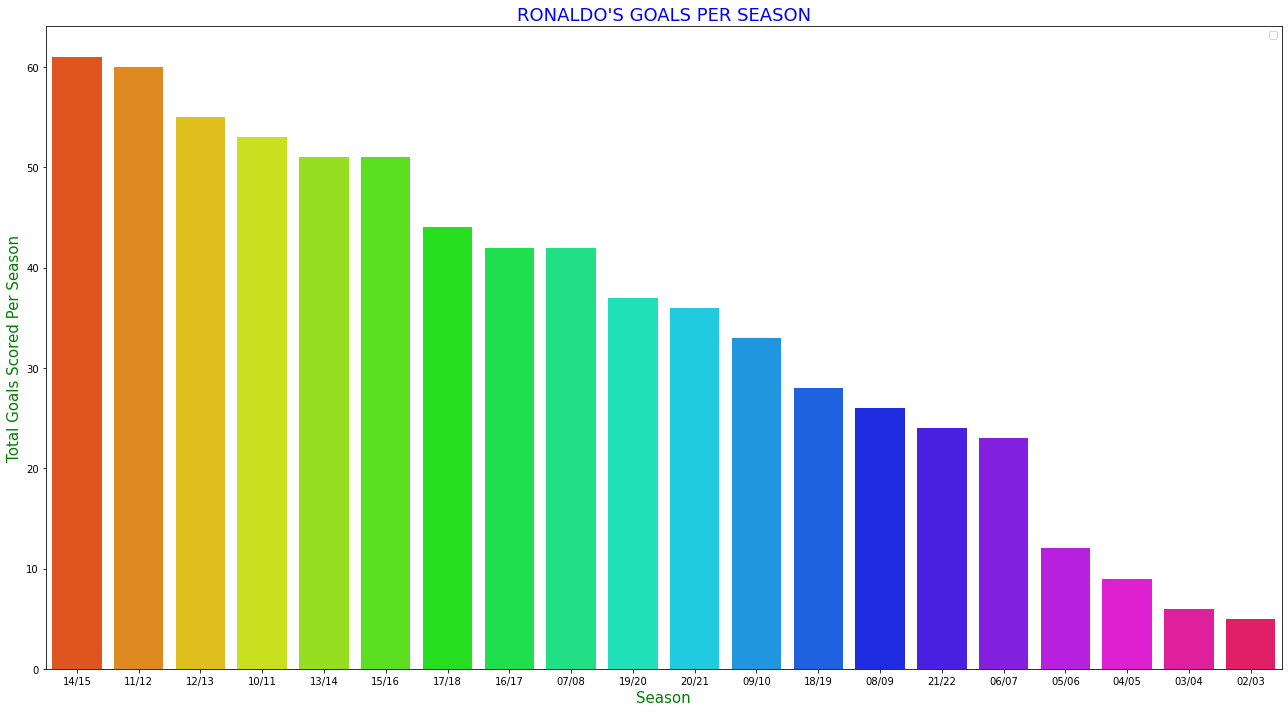

In [22]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='Season', y="TGSPS",
            data=df4,
            palette='hsv',
            order=df4.sort_values('TGSPS',ascending=False).Season)#in descending order
#           order=df4.sort_values('TGSPC').Season)#in ascending order
# set labels
plt.ylabel("Total Goals Scored Per Season",color='g',size=15)
plt.xlabel("Season",color='g',size=15)
plt.title("RONALDO\'S GOALS PER SEASON",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoGPS_barplot_Seaborn_Python.png", dpi=100)


In [23]:
#fig=px.bar(x=df4['Season'],y=df4['TGSPS'],title='RONALDO\'S GOALS PER SEASON',color=df4['Season'],text=df4['TGSPS'],labels={'x':'Season','y':'TGSPS'},color_continuous_scale='earth')
#fig.show()

# Question 3: Plot a graph showing Goals per clubs

In [24]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [25]:
df5=pd.crosstab(df2['Club'],df2['Goals_scored'])
df5.reset_index(inplace=True)
df5.head()

Goals_scored,Club,0,1,2,3,4,5,6,7,9
0,Juventus FC,25,43,22,10,1,0,0,0,0
1,Manchester United,33,47,33,18,8,3,0,0,0
2,Real Madrid,129,135,79,48,28,17,10,3,1
3,Sporting CP,0,1,1,3,0,0,0,0,0


In [26]:
df5.rename({1:'1 Goal Per Match',2:'2 Goals Per Match',3:'3 Goals Per Match',4:'4 Goals Per Match',
5:'5 Goals Per Match',6:'6 Goals Per Match',7:'7 Goals Per Match',8:'8 Goals Per Match',9:'9 Goals Per Match'},axis=1,inplace=True)

df5

Goals_scored,Club,0,1 Goal Per Match,2 Goals Per Match,3 Goals Per Match,4 Goals Per Match,5 Goals Per Match,6 Goals Per Match,7 Goals Per Match,9 Goals Per Match
0,Juventus FC,25,43,22,10,1,0,0,0,0
1,Manchester United,33,47,33,18,8,3,0,0,0
2,Real Madrid,129,135,79,48,28,17,10,3,1
3,Sporting CP,0,1,1,3,0,0,0,0,0


In [27]:
df5['TGSPclub']=df5['1 Goal Per Match']+df5['2 Goals Per Match']+df5['3 Goals Per Match']+df5['4 Goals Per Match']+df5['5 Goals Per Match']+df5['6 Goals Per Match']+df5['7 Goals Per Match']+df5['9 Goals Per Match']
df5

Goals_scored,Club,0,1 Goal Per Match,2 Goals Per Match,3 Goals Per Match,4 Goals Per Match,5 Goals Per Match,6 Goals Per Match,7 Goals Per Match,9 Goals Per Match,TGSPclub
0,Juventus FC,25,43,22,10,1,0,0,0,0,76
1,Manchester United,33,47,33,18,8,3,0,0,0,109
2,Real Madrid,129,135,79,48,28,17,10,3,1,321
3,Sporting CP,0,1,1,3,0,0,0,0,0,5


No handles with labels found to put in legend.


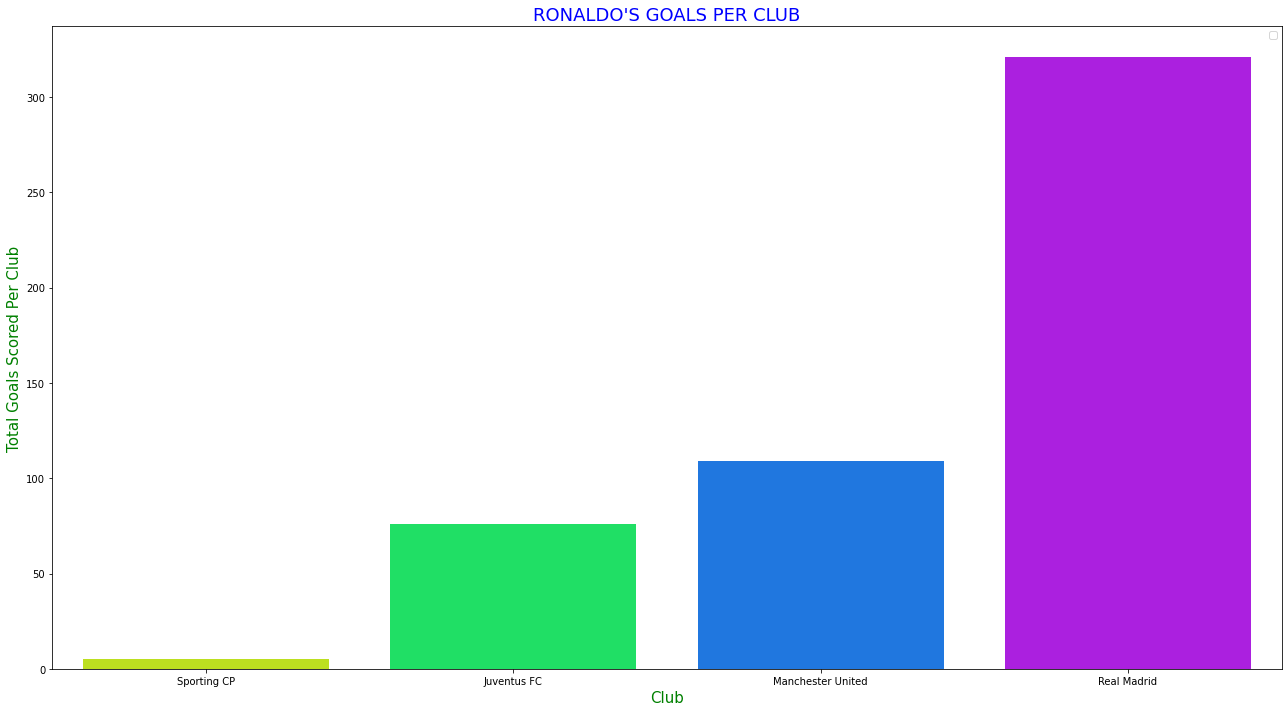

In [28]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='Club', y="TGSPclub",
            data=df5,
            palette='hsv',
#            order=df5.sort_values('TGSPclub',ascending=False).Club)#in descending order
           order=df5.sort_values('TGSPclub').Club)#in ascending order
# set labels
plt.ylabel("Total Goals Scored Per Club",color='g',size=15)
plt.xlabel("Club",color='g',size=15)
plt.title("RONALDO\'S GOALS PER CLUB",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoGPclub_barplot_Seaborn_Python.png", dpi=100)


In [29]:
#fig=px.bar(x=df5['Club'],y=df5['TGSPclub'],title='RONALDO\'S GOALS PER CLUB',color=df5['Club'],text=df5['TGSPclub'],labels={'x':'Club','y':'TGSPclub'},color_continuous_scale='Portland')
#fig.show()

# Question 4:Plot a graph showing Goals per playing Position

In [30]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [31]:
df6=pd.crosstab(df2['Playing_Position'],df2['Club'])
df6.reset_index(inplace=True)
df6.head()

Club,Playing_Position,Juventus FC,Manchester United,Real Madrid,Sporting CP
0,CF,62,28,111,0
1,LW,39,44,330,5
2,RW,0,70,9,0


In [32]:
df2['Playing_Position'].unique()

array(['LW', 'RW', 'CF'], dtype=object)

In [33]:
df6['TGSPPlaying_Position']=df6['Juventus FC']+df6['Manchester United']+df6['Real Madrid']+df6['Sporting CP']
df6

Club,Playing_Position,Juventus FC,Manchester United,Real Madrid,Sporting CP,TGSPPlaying_Position
0,CF,62,28,111,0,201
1,LW,39,44,330,5,418
2,RW,0,70,9,0,79


No handles with labels found to put in legend.


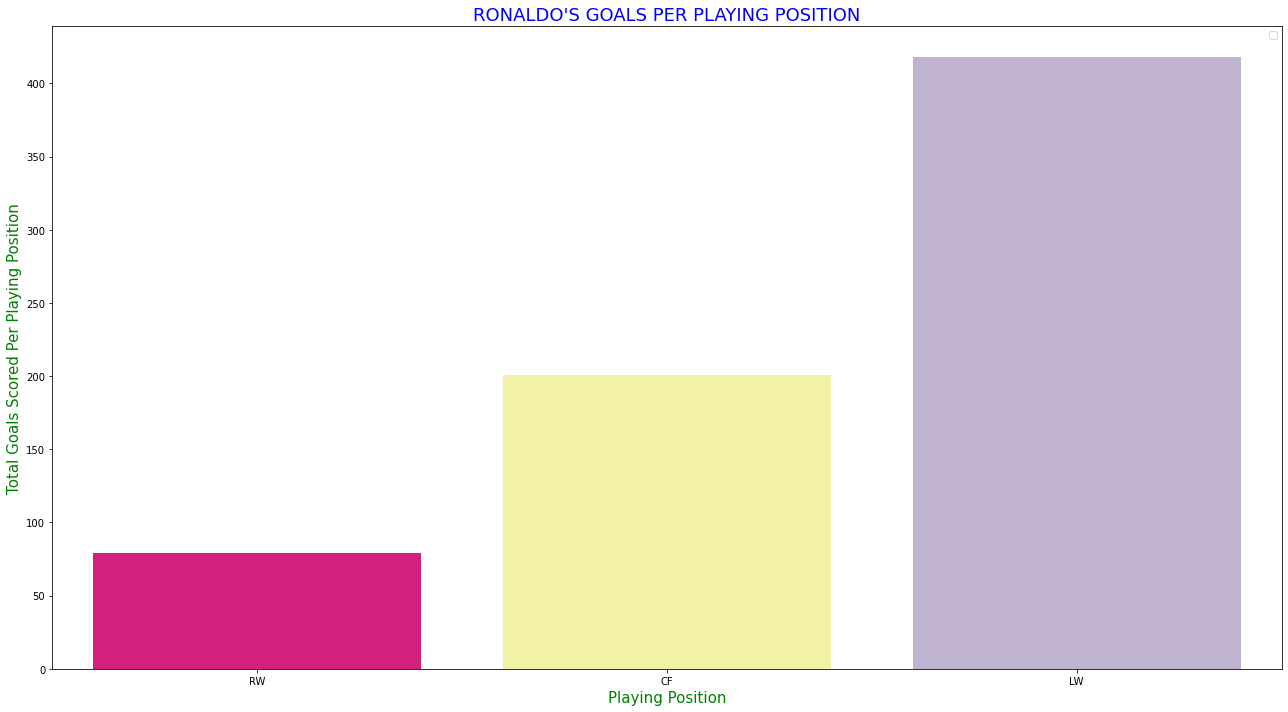

In [34]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='Playing_Position', y="TGSPPlaying_Position",
            data=df6,
            palette='Accent_r',
#            order=df6.sort_values('TGSPPlaying_Position',ascending=False).Club)#in descending order
           order=df6.sort_values('TGSPPlaying_Position').Playing_Position)#in ascending order
# set labels
plt.ylabel("Total Goals Scored Per Playing Position",color='g',size=15)
plt.xlabel("Playing Position",color='g',size=15)
plt.title("RONALDO\'S GOALS PER PLAYING POSITION",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoGPPlaying_Position_barplot_Seaborn_Python.png", dpi=100)


In [35]:
#fig=px.bar(x=df6['Playing_Position'],y=df6['TGSPPlaying_Position'],title='RONALDO\'S GOALS PER PLAYING POSITION',color=df6['Playing_Position'],text=df6['TGSPPlaying_Position'],labels={'x':'Playing_Position','y':'TGSPPlaying_Position'},color_continuous_scale='earth')
#fig.show()

# Question 5: Plot a graph showing Goals per Game Minute

In [36]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [37]:
df7=pd.crosstab(df2['Minute'],df2['Goals_scored'])
df7.reset_index(inplace=True)
df7

Goals_scored,Minute,0,1,2,3,4,5,6,7,9
0,1,0,1,0,0,0,0,0,0,0
1,10,5,4,1,0,0,0,0,0,0
2,103,1,0,0,0,0,0,0,0,0
3,104,0,0,0,0,1,0,0,0,0
4,105,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
101,90+4,0,0,1,0,1,0,0,0,0
102,90+5,0,0,1,1,0,0,0,0,0
103,90+6,0,1,1,0,0,0,0,0,0
104,90+7,0,1,0,0,0,0,0,0,0


In [38]:
df7.rename({1:'1 Goal',2:'2 Goals',3:'3 Goals',4:'4 Goals',5:'5 Goals',6:'6 Goals',7:'7 Goals',8:'8 Goals',9:'9 Goals'},axis=1,inplace=True)

df7

Goals_scored,Minute,0,1 Goal,2 Goals,3 Goals,4 Goals,5 Goals,6 Goals,7 Goals,9 Goals
0,1,0,1,0,0,0,0,0,0,0
1,10,5,4,1,0,0,0,0,0,0
2,103,1,0,0,0,0,0,0,0,0
3,104,0,0,0,0,1,0,0,0,0
4,105,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
101,90+4,0,0,1,0,1,0,0,0,0
102,90+5,0,0,1,1,0,0,0,0,0
103,90+6,0,1,1,0,0,0,0,0,0
104,90+7,0,1,0,0,0,0,0,0,0


In [39]:
df7['TGSPGM']=df7['1 Goal']+df7['2 Goals']+df7['3 Goals']+df7['4 Goals']+df7['5 Goals']+df7['6 Goals']+df7['7 Goals']+df7['9 Goals']
df7

Goals_scored,Minute,0,1 Goal,2 Goals,3 Goals,4 Goals,5 Goals,6 Goals,7 Goals,9 Goals,TGSPGM
0,1,0,1,0,0,0,0,0,0,0,1
1,10,5,4,1,0,0,0,0,0,0,5
2,103,1,0,0,0,0,0,0,0,0,0
3,104,0,0,0,0,1,0,0,0,0,1
4,105,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
101,90+4,0,0,1,0,1,0,0,0,0,2
102,90+5,0,0,1,1,0,0,0,0,0,2
103,90+6,0,1,1,0,0,0,0,0,0,2
104,90+7,0,1,0,0,0,0,0,0,0,1


No handles with labels found to put in legend.


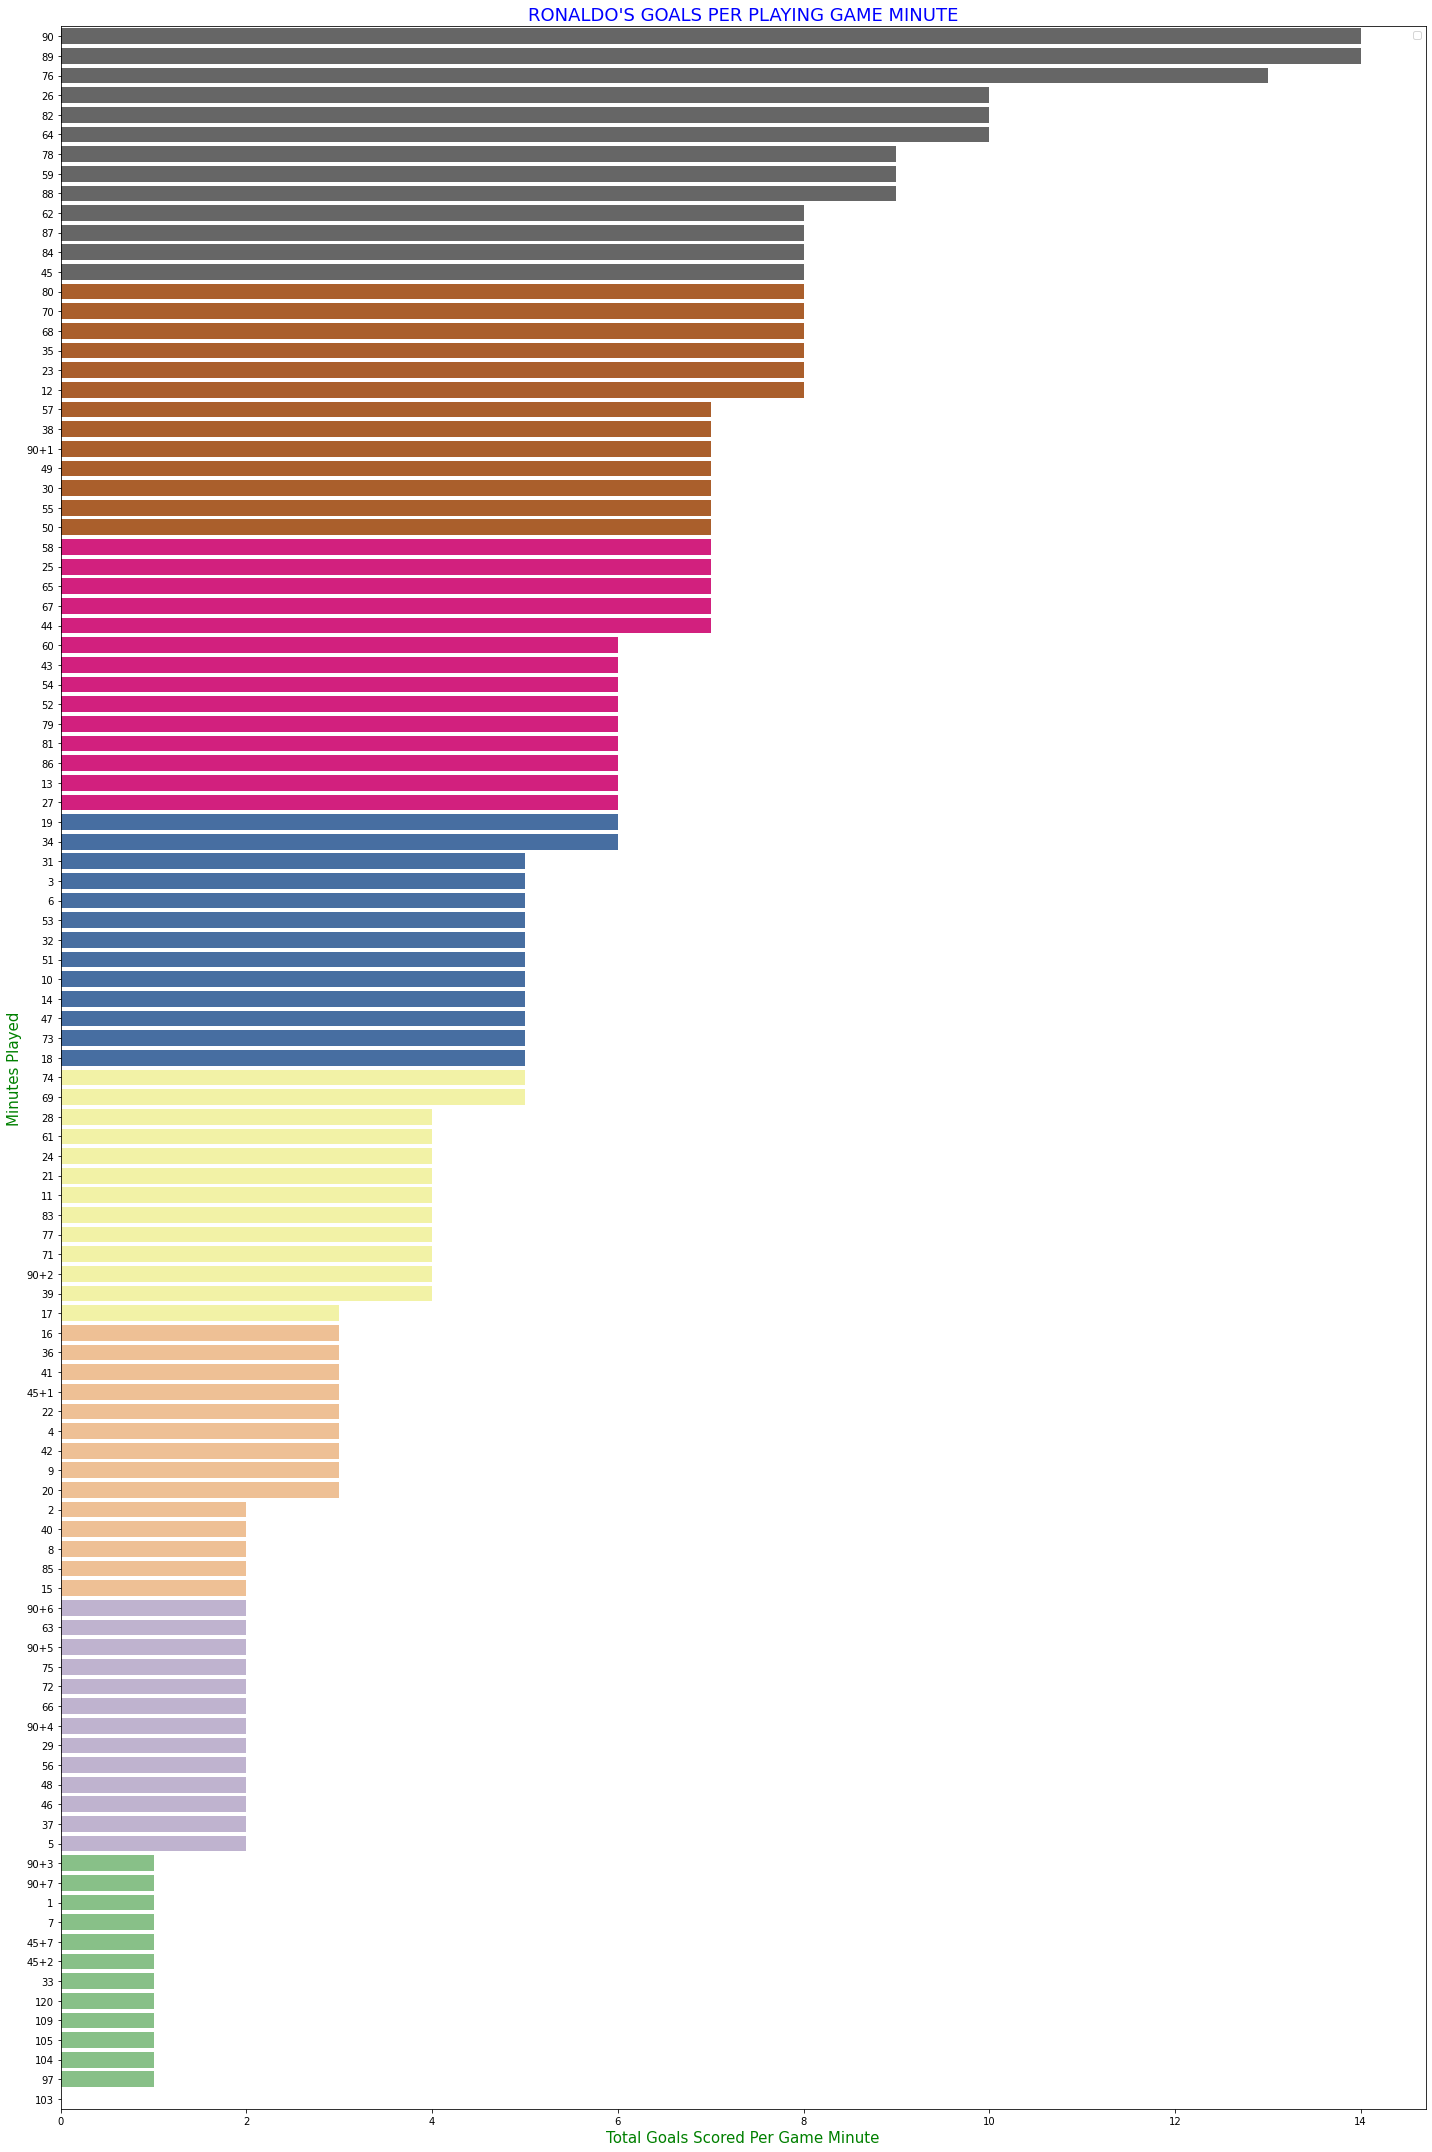

In [40]:
plt.figure(figsize=(20,30))
# make barplot
sns.barplot(x='TGSPGM', y="Minute",
            data=df7,
            palette='Accent_r',
            order=df7.sort_values('TGSPGM',ascending=False).Minute)#in descending order
#           order=df7.sort_values('TGSPPlaying_Position').Playing_Position)#in ascending order
# set labels
plt.ylabel("Minutes Played",color='g',size=15)
plt.xlabel("Total Goals Scored Per Game Minute",color='g',size=15)
plt.title("RONALDO\'S GOALS PER PLAYING GAME MINUTE",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoGPPlaying_Position_barplot_Seaborn_Python.png", dpi=100)


In [41]:
#fig=px.bar(x=df7['Minute'],y=df7['TGSPGM'],title='RONALDO\'S GOALS PER PLAYING GAME MINUTE',color=df7['Minute'],text=df7['TGSPGM'],labels={'x':'Minute','y':'TGSPGM'},color_continuous_scale='picnic')
#fig.show()

# Question 6: Plot a graph showing Goals per Type_of_goal

In [42]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [43]:
df8=pd.crosstab(df2['Type'],df2['Goals_scored'])
df8.reset_index(inplace=True)
df8

Goals_scored,Type,0,1,2,3,4,5,6,7,9
0,Counter attack goal,1,1,1,1,0,0,0,0,0
1,Deflected shot on goal,0,1,0,0,0,1,0,0,0
2,Direct free kick,16,13,9,6,2,2,0,0,0
3,Header,26,35,25,15,4,3,3,0,1
4,Left-footed shot,34,26,25,15,6,3,1,0,0
5,Long distance kick,3,3,2,0,1,0,0,0,0
6,Penalty,30,48,26,11,8,3,2,0,0
7,Penalty rebound,0,1,1,1,0,0,0,0,0
8,Right-footed shot,72,93,43,30,14,7,4,3,0
9,Solo run,0,1,1,0,0,0,0,0,0


In [44]:
df8.rename({1:'1 Goal',2:'2 Goals',3:'3 Goals',4:'4 Goals',5:'5 Goals',6:'6 Goals',7:'7 Goals',8:'8 Goals',9:'9 Goals'},axis=1,inplace=True)

df8

Goals_scored,Type,0,1 Goal,2 Goals,3 Goals,4 Goals,5 Goals,6 Goals,7 Goals,9 Goals
0,Counter attack goal,1,1,1,1,0,0,0,0,0
1,Deflected shot on goal,0,1,0,0,0,1,0,0,0
2,Direct free kick,16,13,9,6,2,2,0,0,0
3,Header,26,35,25,15,4,3,3,0,1
4,Left-footed shot,34,26,25,15,6,3,1,0,0
5,Long distance kick,3,3,2,0,1,0,0,0,0
6,Penalty,30,48,26,11,8,3,2,0,0
7,Penalty rebound,0,1,1,1,0,0,0,0,0
8,Right-footed shot,72,93,43,30,14,7,4,3,0
9,Solo run,0,1,1,0,0,0,0,0,0


In [45]:
df8['TGSPtype']=df8['1 Goal']+df8['2 Goals']+df8['3 Goals']+df8['4 Goals']+df8['5 Goals']+df8['6 Goals']+df8['7 Goals']+df8['9 Goals']
df8

Goals_scored,Type,0,1 Goal,2 Goals,3 Goals,4 Goals,5 Goals,6 Goals,7 Goals,9 Goals,TGSPtype
0,Counter attack goal,1,1,1,1,0,0,0,0,0,3
1,Deflected shot on goal,0,1,0,0,0,1,0,0,0,2
2,Direct free kick,16,13,9,6,2,2,0,0,0,32
3,Header,26,35,25,15,4,3,3,0,1,86
4,Left-footed shot,34,26,25,15,6,3,1,0,0,76
5,Long distance kick,3,3,2,0,1,0,0,0,0,6
6,Penalty,30,48,26,11,8,3,2,0,0,98
7,Penalty rebound,0,1,1,1,0,0,0,0,0,3
8,Right-footed shot,72,93,43,30,14,7,4,3,0,194
9,Solo run,0,1,1,0,0,0,0,0,0,2


No handles with labels found to put in legend.


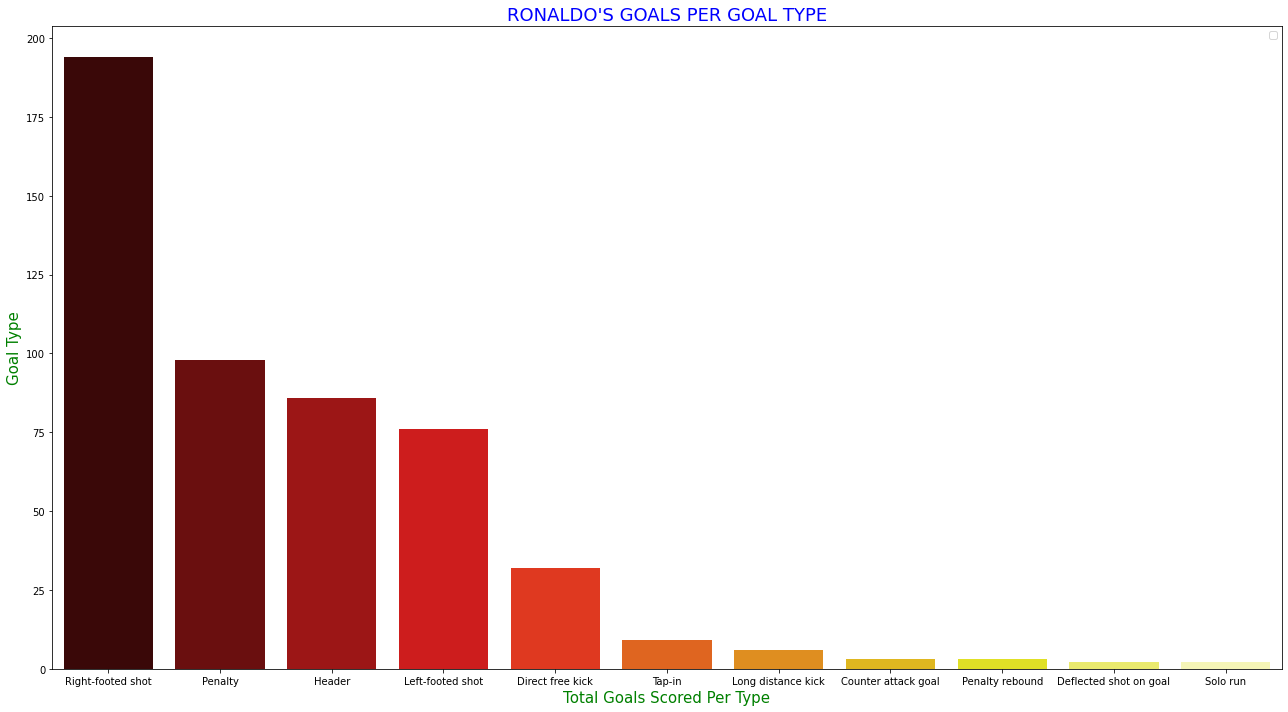

In [46]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='Type', y="TGSPtype",
            data=df8,
            palette='hot',
            order=df8.sort_values('TGSPtype',ascending=False).Type)#in descending order
#           order=df7.sort_values('TGSPPlaying_Position').Playing_Position)#in ascending order
# set labels
plt.ylabel("Goal Type",color='g',size=15)
plt.xlabel("Total Goals Scored Per Type",color='g',size=15)
plt.title("RONALDO\'S GOALS PER GOAL TYPE",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoTGSPtype_barplot_Seaborn_Python.png", dpi=100)


In [47]:
#fig=px.bar(x=df8['Type'],y=df8['TGSPtype'],title='RONALDO\'S GOALS PER GOAL TYPE',color=df8['Type'],text=df8['TGSPtype'],
#           labels={'x':'Type','y':'TGSPtype'},color_continuous_scale='burn')
#fig.show()

# Question 7: Plot a graph showing Favourite Opponents

In [48]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [49]:
df9=pd.crosstab(df2['Opponent'],df2['Goals_scored'])
df9

Goals_scored,0,1,2,3,4,5,6,7,9
Opponent,,,,,,,,,
AC Milan,2,4,0,0,0,0,0,0,0
ACF Fiorentina,1,1,1,0,0,0,0,0,0
AJ Auxerre,0,0,1,0,0,0,0,0,0
APOEL Nicosia,2,2,1,1,0,0,0,0,0
AS Roma,3,4,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
Watford FC,0,2,0,0,0,0,0,0,0
West Bromwich Albion,2,1,1,0,0,0,0,0,0
West Ham United,1,3,2,0,0,0,0,0,0


In [50]:
df9.reset_index(inplace=True)

In [51]:
df9['TGSOpponent']=df9[1]+df9[2]+df9[3]+df9[4]+df9[5]+df9[6]+df9[7]+df9[9]

In [52]:
df9

Goals_scored,Opponent,0,1,2,3,4,5,6,7,9,TGSOpponent
0,AC Milan,2,4,0,0,0,0,0,0,0,4
1,ACF Fiorentina,1,1,1,0,0,0,0,0,0,2
2,AJ Auxerre,0,0,1,0,0,0,0,0,0,1
3,APOEL Nicosia,2,2,1,1,0,0,0,0,0,4
4,AS Roma,3,4,1,0,1,1,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...
119,Watford FC,0,2,0,0,0,0,0,0,0,2
120,West Bromwich Albion,2,1,1,0,0,0,0,0,0,2
121,West Ham United,1,3,2,0,0,0,0,0,0,5
122,Wigan Athletic,1,2,2,2,0,0,0,0,0,6


No handles with labels found to put in legend.


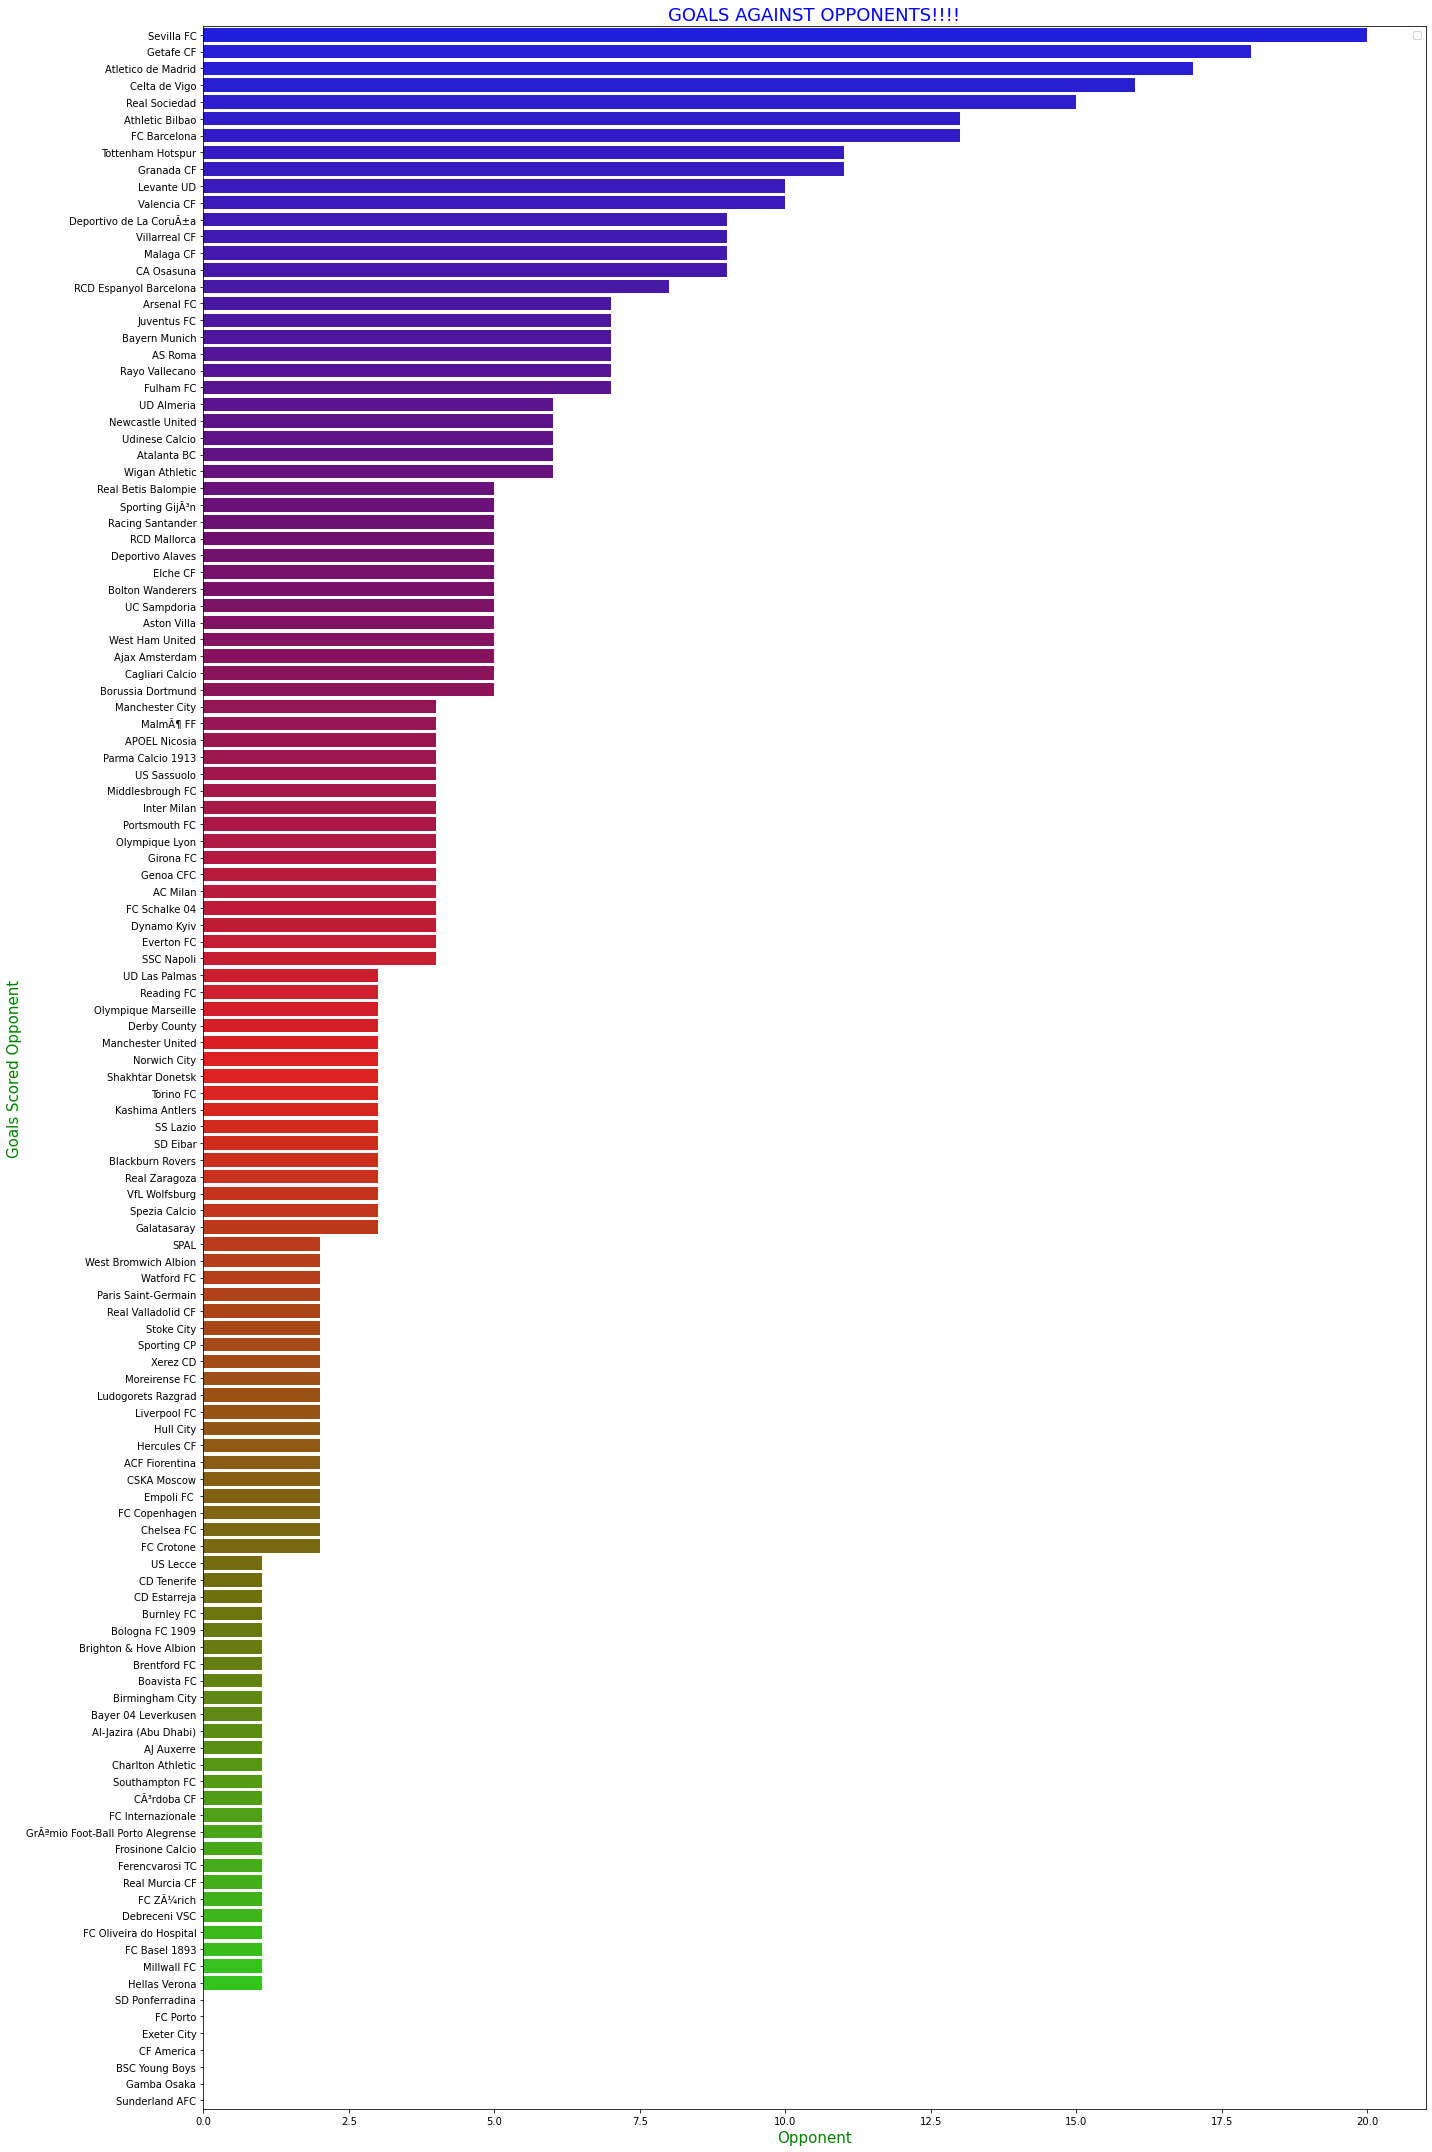

In [53]:
plt.figure(figsize=(20,30))
# make barplot
sns.barplot(x='TGSOpponent', y="Opponent",
            data=df9,
            palette='brg',
            order=df9.sort_values('TGSOpponent',ascending=False).Opponent)#in descending order
#           order=df7.sort_values('TGSPPlaying_Position').Playing_Position)#in ascending order
# set labels
plt.ylabel("Goals Scored Opponent",color='g',size=15)
plt.xlabel("Opponent",color='g',size=15)
plt.title("GOALS AGAINST OPPONENTS!!!!",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("RonaldoTGSopponent_barplot_Seaborn_Python.png", dpi=100)


In [54]:
#fig=px.bar(x=df9['Opponent'],y=df9['TGSOpponent'],
#          title='GOALS AGAINST OPPONENTS!!!!',color=df9['Opponent'],text=df9['TGSOpponent'],
#           labels={'x':'OPPONENTS','y':'TOTAL GOALS SCORED'},color_continuous_scale='earth')
#figsize=(30,35)
#fig.show()

### FAVOURITE OPPONENTS

In [55]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


<BarContainer object of 7 artists>

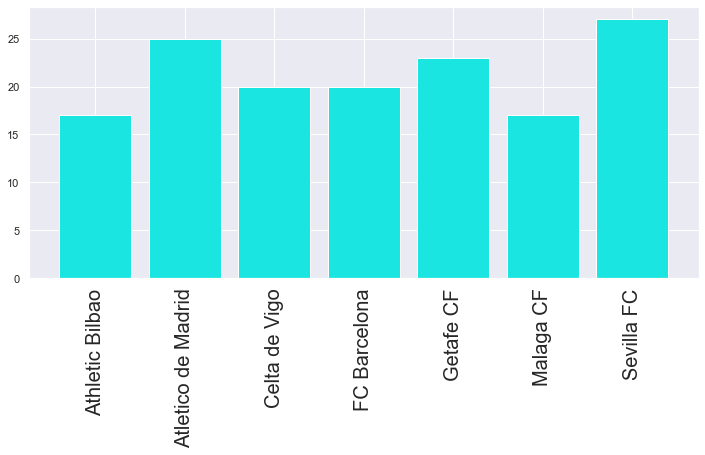

In [56]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df2.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

# Question 8. Plot a graph showing Goals Assisted by Others

In [65]:
df2.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,Goals_scored,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2,Solo run,Nill
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,LW,88,1,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,LW,67,3,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,LW,13,3,Right-footed shot,Nill


In [71]:
df_assist=df2.copy()

In [72]:
#drop rows based on loan goals without assist (where 'Nill is indicated)
df_assist.drop(df_assist[df_assist['Goal_assist'] == 'Nill'].index,inplace=True)


In [73]:
mins=list(map(str, df_assist.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df_assist['Goal_assist']:
    if min not in mins:
        mins.append(min)
#mins1=mins[:int(len(mins)/5)]
#mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
#mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
#mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
#mins5=mins[int(4*len(mins)/5):]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals Assisted by Others')

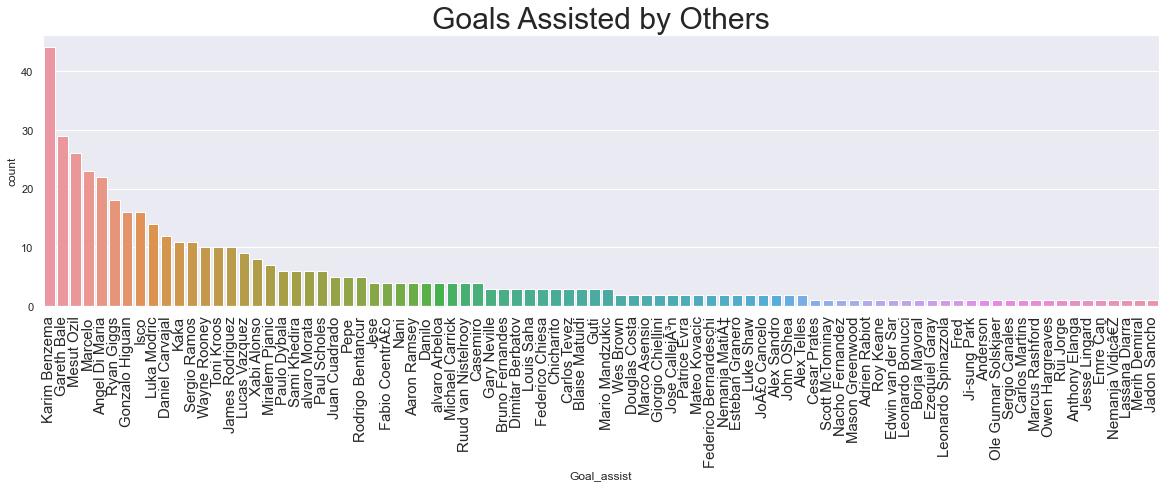

In [74]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df_assist['Goal_assist'],order=mins)
p.axes.set_title("Goals Assisted by Others",fontsize=30)